In [36]:
import networkx as nx

n = 500

# Subcritical network with p < 1 / (n - 1)
p_subcritical = 0.75 / (n - 1)
subcritical_network = nx.erdos_renyi_graph(n, p_subcritical)

# Critical network with p = 1 / (n - 1)
p_critical = 1 / (n - 1)
critical_network = nx.erdos_renyi_graph(n, p_critical)

# Supercritical network with p > 1 / (n - 1)
p_supercritical = 3 / (n - 1)
supercritical_network = nx.erdos_renyi_graph(n, p_supercritical)

# Check the average clustering coefficient of each network
print("Average clustering coefficient of subcritical network:", nx.average_clustering(subcritical_network))
print("Average clustering coefficient of critical network:", nx.average_clustering(critical_network))
print("Average clustering coefficient of supercritical network:", nx.average_clustering(supercritical_network))

# connected regime
p_cr = 10 / (n - 1)
cr_network = nx.erdos_renyi_graph(n, p_cr)
print("Average clustering coefficient of connected regime network:", nx.average_clustering(cr_network))


Average clustering coefficient of subcritical network: 0.0
Average clustering coefficient of critical network: 0.003333333333333333
Average clustering coefficient of supercritical network: 0.009295238095238096
Average clustering coefficient of connected regime network: 0.022407427608511207


In [37]:
# Finding degree range

# Subcritical network   
subcritical_degree = sorted([d for n, d in subcritical_network.degree()])
print("Degree range of subcritical network:", subcritical_degree[0], subcritical_degree[-1])

# Critical network
critical_degree = sorted([d for n, d in critical_network.degree()])
print("Degree range of critical network:", critical_degree[0], critical_degree[-1])

# Supercritical network
supercritical_degree = sorted([d for n, d in supercritical_network.degree()])
print("Degree range of supercritical network:", supercritical_degree[0], supercritical_degree[-1])

# connected regime
cr_degree = sorted([d for n, d in cr_network.degree()])
print("Degree range of connected regime network:", cr_degree[0], cr_degree[-1])

Degree range of subcritical network: 0 5
Degree range of critical network: 0 4
Degree range of supercritical network: 0 8
Degree range of connected regime network: 2 21


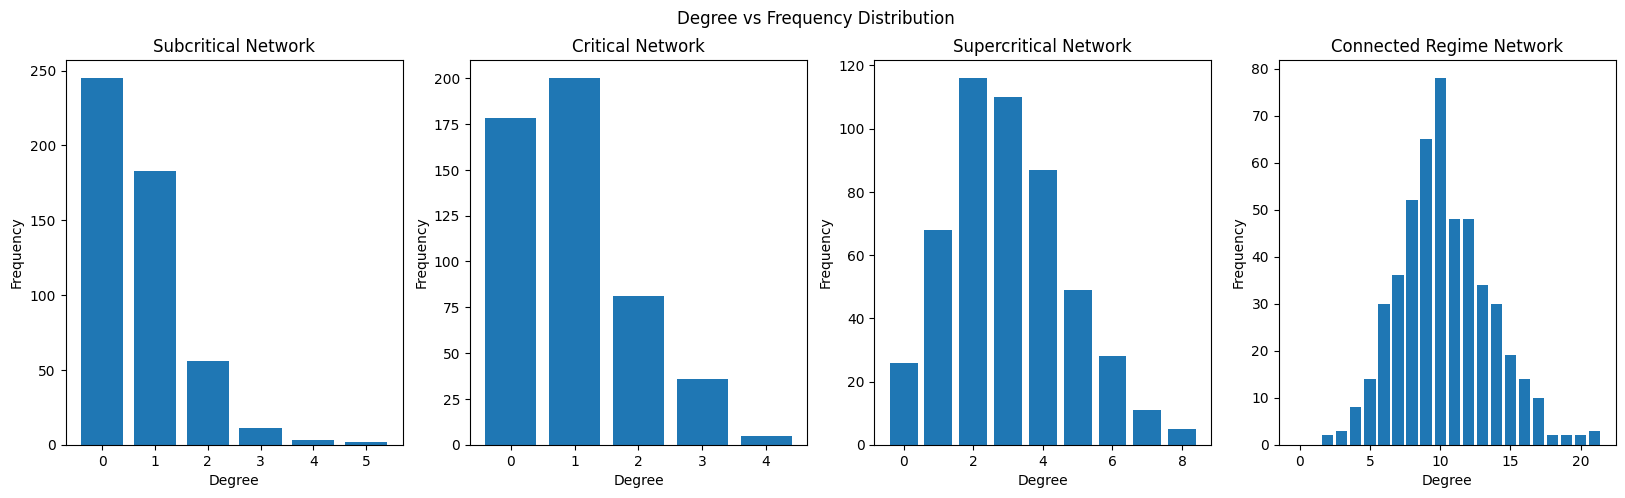

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Degree vs Frequency Distribution')
splot = 0

def vis_degree(G, subtitle):
    global splot
    degree_counts = nx.degree_histogram(G)
    ax = axs[splot]

    ax.bar(range(len(degree_counts)), degree_counts)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title(subtitle)

    splot += 1
    if splot == 4:
        plt.show()

vis_degree(subcritical_network, 'Subcritical Network')
vis_degree(critical_network, 'Critical Network')
vis_degree(supercritical_network, 'Supercritical Network')
vis_degree(cr_network, 'Connected Regime Network')

In [100]:
#Calculating the mean degree of each network
print("Mean degree of subcritical network:", sum(subcritical_degree) / n)
print("Mean degree of critical network:", sum(critical_degree) / n)
print("Mean degree of supercritical network:", sum(supercritical_degree) / n)
print("Mean degree of connected regime network:", sum(cr_degree) / n)

Mean degree of subcritical network: 0.7
Mean degree of critical network: 0.98
Mean degree of supercritical network: 3.016
Mean degree of connected regime network: 10.3


In [47]:
subcritical_network.number_of_edges(),critical_network.number_of_edges(),supercritical_network.number_of_edges()

(175, 245, 754)

In [46]:
import matplotlib.patches as mpatches

# Function to assign color to nodes based on their degree
# Since max_degree is 9, we will assign colors based on the following ranges:
def get_node_color(G):
    node_color = []
    for node in G.nodes():
        degree = G.degree[node]
        if degree == 0:
            node_color.append('darkgray')
        elif degree == 1:
            node_color.append('#ADD8E6')  # Light blue
        elif degree == 2:
            node_color.append('#90EE90')  # Light green
        elif degree == 3:
            node_color.append('#FFFFE0')  # Light yellow
        elif degree == 4:
            node_color.append('#FFDAB9')  # Light orange
        elif degree == 5:
            node_color.append('#FFC0CB')  # Light pink
        elif degree == 6:
            node_color.append('#E6E6FA')  # Lavender
        elif degree == 7:
            node_color.append('#E0FFFF')  # Light cyan
        elif degree == 8:
            node_color.append('#FF6347')  # Tomato
        elif degree == 9:
            node_color.append('darkblue')  # Dark blue
    return node_color

def get_node_color_by_degree(degree):
    if degree == 0:
        return 'darkgray'
    elif degree == 1:
        return '#ADD8E6'  # Light blue
    elif degree == 2:
        return '#90EE90'  # Light green
    elif degree == 3:
        return '#FFFFE0'  # Light yellow
    elif degree == 4:
        return '#FFDAB9'  # Light orange
    elif degree == 5:
        return '#FFC0CB'  # Light pink
    elif degree == 6:
        return '#E6E6FA'  # Lavender
    elif degree == 7:
        return '#E0FFFF'  # Light cyan
    elif degree == 8:
        return '#FF6347'  # Tomato
    elif degree == 9:
        return 'darkblue'

# Function to assign node sizes proportional to their degrees
# The node size follows a function of the form: y = 30x + 20 where x is the degree. This is to easily visualise the range from 0 to 9.
def get_node_size(G):
    node_size = [deg * 30 + 20 for _, deg in G.degree()]
    return node_size


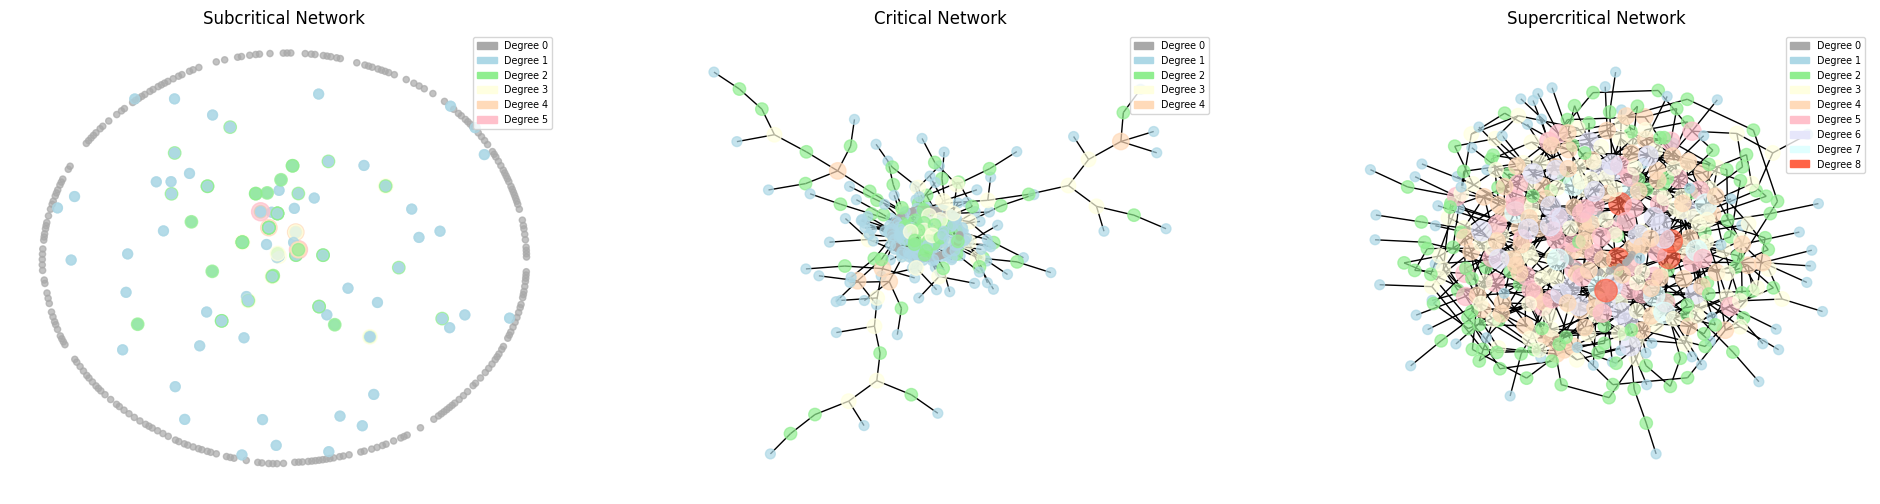

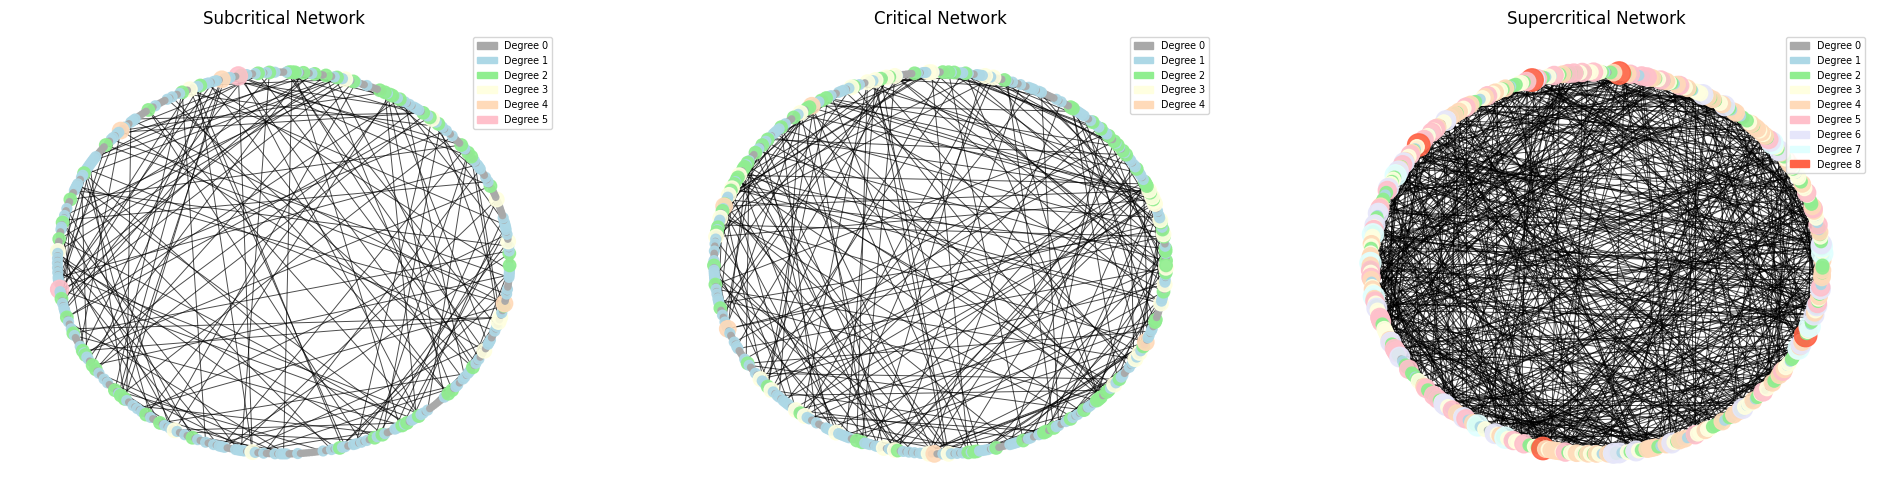

In [99]:
def get_network_name(G):
    def get_variable_name(value):
        for name, val in globals().items():
            if val is value:
                return name
            
    name = get_variable_name(G)

    return name.replace("_", " ").title()

# Function to visualize the network       
def visualize_networks(G1, G2, G3, layout_circular=False):
    plt.figure(figsize=(24, 6))  # Adjust the total figure size

    for i, G in enumerate([G1, G2, G3], start=1):
        # Get node colors and sizes
        node_color = get_node_color(G)
        node_size = get_node_size(G)

        # Draw the network
        ax = plt.subplot(1, 3, i)  # Create a new subplot for this network
        ax.set_title(get_network_name(G))
        
        if layout_circular:
            pos = nx.circular_layout(G)
            nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.9)
            nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="black", width=0.7)
        else:
            pos = nx.kamada_kawai_layout(G)
            if i>1: 
                nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.7)
                nx.draw_networkx_edges(G, pos, alpha=1, edge_color="black")
            else:
                nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=0.7)
                nx.draw_networkx_edges(G, pos, alpha=1, edge_color="black", width=4)

        # Create legend
        max_degree = max(dict(G.degree()).values())
        legend_handles = []
        for j in range(max_degree+1):
            legend_handles.append(mpatches.Patch(color=get_node_color_by_degree(j), label=f'Degree {j}'))
        plt.legend(handles=legend_handles, loc='upper right', fontsize='x-small')

        plt.axis('off')

    plt.show()

# Visualize the networks
visualize_networks(subcritical_network, critical_network, supercritical_network)
visualize_networks(subcritical_network, critical_network, supercritical_network, layout_circular=True)

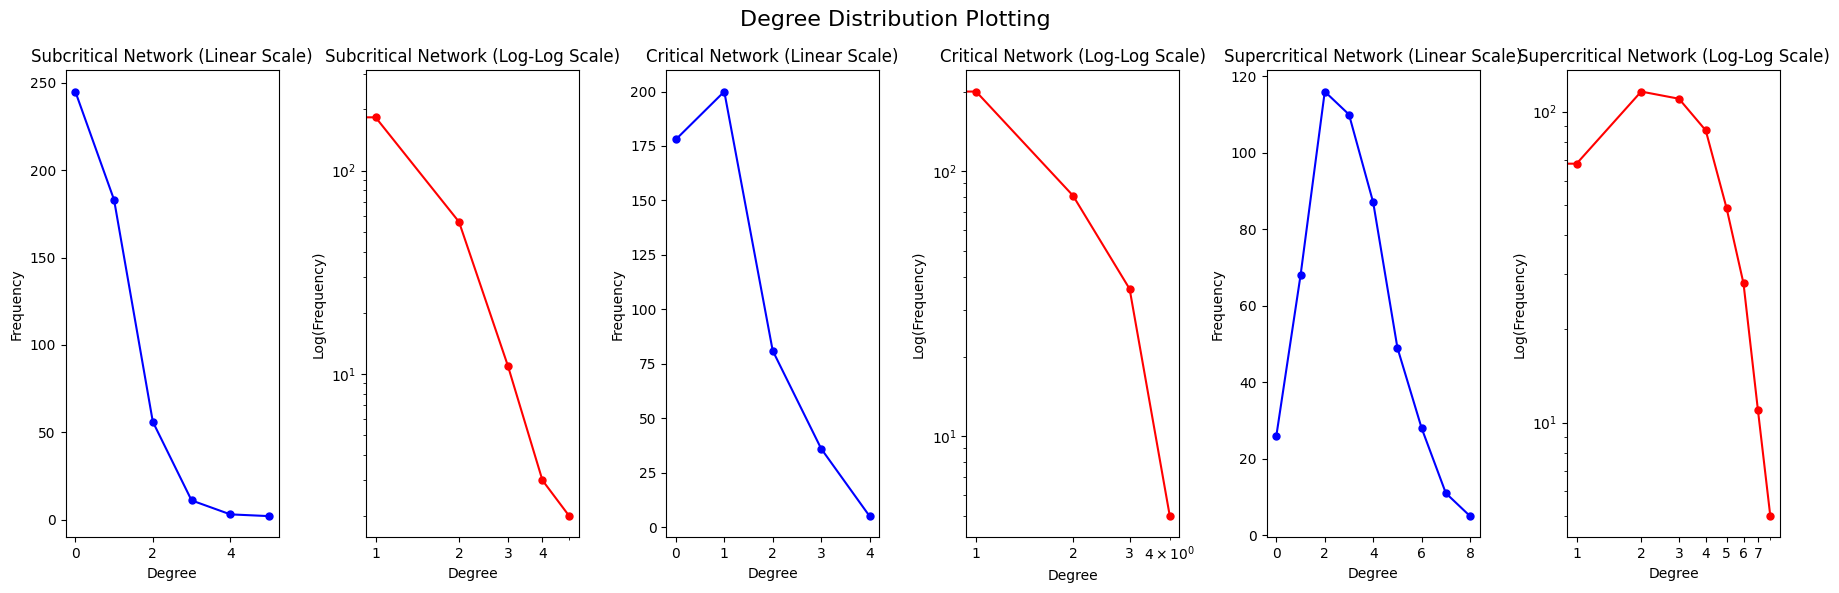

In [43]:
from matplotlib.ticker import ScalarFormatter

# Function to plot degree distribution
def plot_degree_distribution_row(networks, titles):
    fig, axs = plt.subplots(1, 6, figsize=(18, 6))

    for i, (G, title) in enumerate(zip(networks, titles)):
        degrees = [G.degree(node) for node in G.nodes()]
        degree_counts = nx.degree_histogram(G)
        degrees_range = range(len(degree_counts))
        
        # Plot degree distribution on linear scale
        axs[i*2].plot(degrees_range, degree_counts, 'bo-', markersize=5)
        axs[i*2].set_title(title + ' (Linear Scale)')
        axs[i*2].set_xlabel('Degree')
        axs[i*2].set_ylabel('Frequency')
        axs[i*2].xaxis.set_major_formatter(ScalarFormatter(useMathText=False))  # Prevent scientific notation

        # Plot degree distribution on log-log scale
        max_degree = max(degrees_range)
        x_axis = list(range(1,max_degree))

        axs[i*2+1].loglog(degrees_range, degree_counts, 'ro-', markersize=5)
        axs[i*2+1].set_title(title + ' (Log-Log Scale)')
        axs[i*2+1].set_xlabel('Degree')
        axs[i*2+1].set_ylabel('Log(Frequency)')
        axs[i*2+1].set_xticks(x_axis)
        axs[i*2+1].set_xticklabels([str(i) for i in x_axis])  # Set custom tick labels for log-log scale
        axs[i*2+1].xaxis.set_major_formatter(ScalarFormatter(useMathText=False))  # Prevent scientific notation

    fig.suptitle('Degree Distribution Plotting', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot degree distribution for each network
plot_degree_distribution_row([subcritical_network, critical_network, supercritical_network], 
                             ['Subcritical Network', 'Critical Network', 'Supercritical Network'])


In [86]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import chisquare

def p_test(G):

    print(f"For {get_network_name(G)}:")

    # Get the degree distribution
    degree_sequence = [d for n, d in G.degree()]

    # Fit Poisson distribution to the observed degree distribution
    mu = np.mean(degree_sequence)
    poisson_fit = poisson(mu)

    # Calculate observed frequencies
    observed_freq, _ = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2))

    # Calculate expected frequencies from the fitted Poisson distribution
    expected_freq = poisson_fit.pmf(np.arange(max(degree_sequence) + 1)) * len(degree_sequence)

    # Adjust expected frequencies to match the sum of observed frequencies
    expected_freq *= np.sum(observed_freq) / np.sum(expected_freq)

    # Perform chi-square goodness-of-fit test
    chi2_stat, p_value = chisquare(observed_freq, f_exp=expected_freq)

    print("Chi-square statistic:", chi2_stat)
    print("p-value:", p_value)

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis. The degree distribution does not follow a Poisson distribution.\n")
    else:
        print("Fail to reject the null hypothesis. The degree distribution could follow a Poisson distribution.\n")

# Perform the chi-square goodness-of-fit test for each network
p_test(subcritical_network)
p_test(critical_network)
p_test(supercritical_network)

For Subcritical Network:
Chi-square statistic: 9.5891155206948
p-value: 0.08775063209371169
Fail to reject the null hypothesis. The degree distribution could follow a Poisson distribution.

For Critical Network:
Chi-square statistic: 4.9467851345504235
p-value: 0.2928013852545619
Fail to reject the null hypothesis. The degree distribution could follow a Poisson distribution.

For Supercritical Network:
Chi-square statistic: 1.316334281052223
p-value: 0.9953541286990043
Fail to reject the null hypothesis. The degree distribution could follow a Poisson distribution.



In [ ]:
%pip install powerlaw

In [85]:
import numpy as np
from scipy.stats import poisson, expon, norm
from scipy.stats import chisquare, ks_2samp
import powerlaw

def p_test_extensive(G):

    print(f"For {get_network_name(G)}:")

    # Get the degree distribution
    degree_sequence = [d for _, d in G.degree()]

    # Fit candidate distributions to the observed degree distribution
    mu = np.mean(degree_sequence)
    poisson_fit = poisson(mu)
    expon_params = expon.fit(degree_sequence)
    norm_params = norm.fit(degree_sequence)

    # Fit power-law distribution using powerlaw library
    powerlaw_fit = powerlaw.Fit(degree_sequence, discrete=True)

    # Calculate goodness-of-fit statistics for each candidate distribution
    observed_freq, _ = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2))
    expected_freq_poisson = poisson_fit.pmf(np.arange(max(degree_sequence) + 1)) * len(degree_sequence)
    expected_freq_powerlaw = powerlaw_fit.power_law.pdf(np.arange(max(degree_sequence) + 1)) * len(degree_sequence)
    expected_freq_expon = expon.pdf(np.arange(max(degree_sequence) + 1), *expon_params) * len(degree_sequence)
    expected_freq_norm = norm.pdf(np.arange(max(degree_sequence) + 1), *norm_params) * len(degree_sequence)

    # Adjust expected frequencies to match the sum of observed frequencies
    expected_freq_poisson *= np.sum(observed_freq) / np.sum(expected_freq_poisson)
    expected_freq_powerlaw *= np.sum(observed_freq) / np.sum(expected_freq_powerlaw)
    expected_freq_expon *= np.sum(observed_freq) / np.sum(expected_freq_expon)
    expected_freq_norm *= np.sum(observed_freq) / np.sum(expected_freq_norm)

    # Perform goodness-of-fit tests
    chi2_stat_poisson, p_value_poisson = chisquare(observed_freq, f_exp=expected_freq_poisson)
    ks_stat_powerlaw, p_value_powerlaw = ks_2samp(degree_sequence, powerlaw_fit.power_law.cdf(np.arange(max(degree_sequence) + 1)))
    ks_stat_expon, p_value_expon = ks_2samp(degree_sequence, expected_freq_expon)
    ks_stat_norm, p_value_norm = ks_2samp(degree_sequence, expected_freq_norm)

    # Compare p-values
    print("Poisson distribution p-value:", p_value_poisson)
    print("Power-law distribution p-value:", p_value_powerlaw)
    print("Exponential distribution p-value:", p_value_expon)
    print("Normal distribution p-value:", p_value_norm, "\n")

p_test_extensive(subcritical_network)
p_test_extensive(critical_network)
p_test_extensive(supercritical_network)
p_test_extensive(cr_network)

For Subcritical Network:
Calculating best minimal value for power law fit
Poisson distribution p-value: 0.08775063209371169
Power-law distribution p-value: 0.3146705092820228
Exponential distribution p-value: 0.0025481591308446428
Normal distribution p-value: 0.00406677950333255 

For Critical Network:
Calculating best minimal value for power law fit
Poisson distribution p-value: 0.2928013852545619
Power-law distribution p-value: 0.25622062647613114
Exponential distribution p-value: 7.453837131807866e-12
Normal distribution p-value: 0.0007197503101610084 

For Supercritical Network:
Calculating best minimal value for power law fit
Poisson distribution p-value: 0.9953541286990043
Power-law distribution p-value: 0.0060118806212276655
Exponential distribution p-value: 3.397987016429321e-19
Normal distribution p-value: 1.9257289887562198e-08 

For Cr Network:
Calculating best minimal value for power law fit
Poisson distribution p-value: 0.41940337265893124
Power-law distribution p-value: 1

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [51]:
def compute_Po_P_infinity(G):
    # Compute the fraction of nodes in the network (Po)
    Po = len(G.nodes()) / n
    # which will always be equal to 1 since all nodes will be part of the network

    # Compute the fraction of nodes in the largest connected cluster (P∞)
    largest_cc = max(nx.connected_components(G), key=len)
    P_infinity = len(largest_cc) / len(G.nodes())

    # Compute Po/P∞
    Po_Pinfinity = Po / P_infinity
    return Po_Pinfinity

# Compute Po/P∞ for each network
Po_P_infinity_subcritical = compute_Po_P_infinity(subcritical_network)
Po_P_infinity_critical = compute_Po_P_infinity(critical_network)
Po_P_infinity_supercritical = compute_Po_P_infinity(supercritical_network)
Po_P_infinity_connected_regime = compute_Po_P_infinity(cr_network)

# Print the results
print("Po/P∞ for Subcritical Network:", Po_P_infinity_subcritical)
print("Po/P∞ for Critical Network:", Po_P_infinity_critical)
print("Po/P∞ for Supercritical Network:", Po_P_infinity_supercritical)
print("Po/P∞ for Connected Regime Network:", Po_P_infinity_connected_regime)


Po/P∞ for Subcritical Network: 27.77777777777778
Po/P∞ for Critical Network: 10.204081632653061
Po/P∞ for Supercritical Network: 1.0615711252653928
Po/P∞ for Connected Regime Network: 1.0
